In [1]:
#pip install matplotlib

In [18]:
matplotlib --version

UsageError: unrecognized arguments: --version


In [2]:
# Dependencies

import pandas as pd
import numpy as np
import glob
import os
import timeit                                # To check performance
from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt

In [3]:
# Export clean CSV file to master CSV file

tic = timeit.default_timer()                            # Monitor performance

ecobici_rides_df = pd.read_csv("dataset_export_files/ecobici_ride_data_for_sql_import.csv", index_col=None, header=0)

toc = timeit.default_timer()                            # Monitor performance
print(f'Time (in seconds) to import CSV file: {round(toc - tic, 2)}')

Time (in seconds) to import CSV file: 0.55


In [3]:
for col in ecobici_rides_df.columns:
    print(f'{col}, type: {type(ecobici_rides_df.loc[0, col])}')
    


Genero_Usuario, type: <class 'str'>
Edad_Usuario, type: <class 'numpy.int64'>
Ciclo_Estacion_Retiro, type: <class 'numpy.int64'>
Ciclo_Estacion_Arribo, type: <class 'numpy.int64'>
Usage_Timestamp, type: <class 'str'>
Duration(Min), type: <class 'numpy.float64'>


In [5]:
ecobici_rides_df_test = ecobici_rides_df.copy()
ecobici_rides_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707039 entries, 0 to 707038
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Genero_Usuario         707039 non-null  object 
 1   Edad_Usuario           707039 non-null  int64  
 2   Ciclo_Estacion_Retiro  707039 non-null  int64  
 3   Ciclo_Estacion_Arribo  707039 non-null  int64  
 4   Usage_Timestamp        707039 non-null  object 
 5   Duration(Min)          707039 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 32.4+ MB


In [6]:
ecobici_rides_df_test['Usage_Timestamp'] = pd.to_datetime(ecobici_rides_df_test['Usage_Timestamp'])
ecobici_rides_df_test.head()

,Genero_Usuario,Edad_Usuario,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Usage_Timestamp,Duration(Min)
0,M,28,85,85,2010-02-16 12:45:37.427,3.1
1,M,35,78,63,2010-02-19 13:52:30.700,12.1
2,M,34,85,23,2010-02-21 14:30:46.390,26.8
3,M,46,20,17,2010-02-22 16:17:10.470,6.4
4,F,28,74,46,2010-02-23 18:51:57.057,14.9


## Analysis by Gender

In [7]:
ecobici_gender_groupby = ecobici_rides_df_test.groupby([ecobici_rides_df_test.Usage_Timestamp.dt.year, 
                                                        "Genero_Usuario"]).agg({"Usage_Timestamp": "count"}).unstack()

ecobici_gender_groupby

Usage_Timestamp       
Genero_Usuario                F      M
Usage_Timestamp                       
2010                       2279   6132
2011                       6854  18576
2012                       7779  19600
2013                      17994  47159
2014                      21857  57665
2015                      24126  67795
2016                      22582  68114
2017                      23247  71733
2018                      21293  64110
2019                      21157  62997
2020                      10402  29018
2021                       4562  10008

In [8]:
ecobici_gender_groupby.columns = list(map(' '.join, ecobici_gender_groupby.columns.values))

ecobici_gender_groupby = ecobici_gender_groupby.rename(columns={'Usage_Timestamp F': 'Rides F',
                                                       'Usage_Timestamp M': 'Rides M'},
                                                       index={'Usage_Timestamp': 'Year'})

ecobici_gender_groupby.head()

,Usage_Timestamp F,Usage_Timestamp M
Usage_Timestamp,,
2010,2279,6132
2011,6854,18576
2012,7779,19600
2013,17994,47159
2014,21857,57665


In [10]:
ecobici_gender_groupby['Total Rides'] = ecobici_gender_groupby['Rides F'] + ecobici_gender_groupby['Rides M']

ecobici_gender_groupby['% F'] = ecobici_gender_groupby['Rides F'] / ecobici_gender_groupby['Total Rides']
ecobici_gender_groupby['% M'] = ecobici_gender_groupby['Rides M'] / ecobici_gender_groupby['Total Rides']

ecobici_gender_groupby.head()

,Rides F,Rides M,Total Rides,% F,% M
Usage_Timestamp,,,,,
2010,2279,6132,8411,0.270955,0.729045
2011,6854,18576,25430,0.269524,0.730476
2012,7779,19600,27379,0.284123,0.715877
2013,17994,47159,65153,0.276181,0.723819
2014,21857,57665,79522,0.274855,0.725145


In [11]:
ecobici_gender_groupby


,Rides F,Rides M,Total Rides,% F,% M
Usage_Timestamp,,,,,
2010,2279,6132,8411,0.270955,0.729045
2011,6854,18576,25430,0.269524,0.730476
2012,7779,19600,27379,0.284123,0.715877
2013,17994,47159,65153,0.276181,0.723819
2014,21857,57665,79522,0.274855,0.725145
2015,24126,67795,91921,0.262465,0.737535
2016,22582,68114,90696,0.248986,0.751014
2017,23247,71733,94980,0.244757,0.755243
2018,21293,64110,85403,0.249324,0.750676


In [12]:
# Set up some basic plt formatting configurations

plt.rc('font', size=12)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=20)

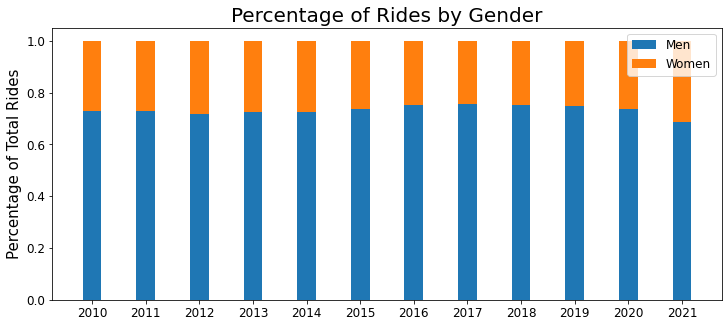

In [34]:
xtick_labels = ecobici_gender_groupby.index.tolist()
xtick_count = [x for x in range(1, len(xtick_labels)+1)]   # the x locations for the groups

m_percent = ecobici_gender_groupby['% M']
w_percent = ecobici_gender_groupby['% F']

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12,5))

ax.bar(xtick_count, m_percent, width, label='Men')
ax.bar(xtick_count, w_percent, width, bottom=m_percent,
       label='Women')

ax.set_xticks(xtick_count)
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Percentage of Total Rides')
ax.set_title('Percentage of Rides by Gender')
ax.legend()

plt.show()


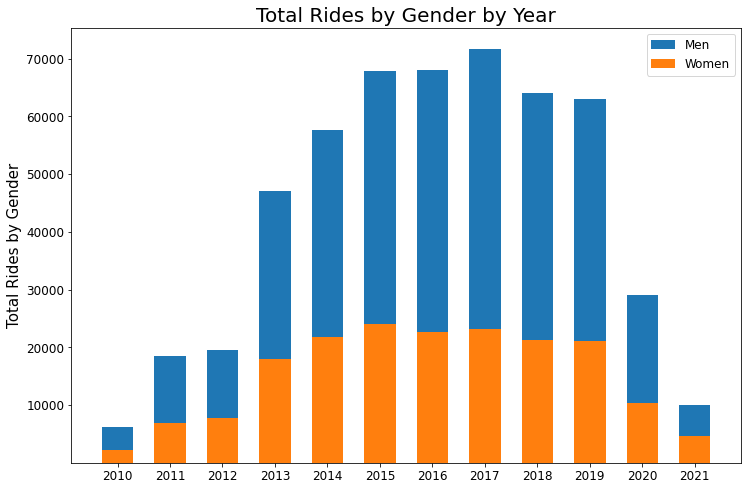

In [36]:
xtick_labels = ecobici_gender_groupby.index.tolist()
xtick_count = [x for x in range(1, len(xtick_labels)+1)]   # the x locations for the groups

m_rides = ecobici_gender_groupby['Rides M']
f_rides = ecobici_gender_groupby['Rides F']

width = 0.6       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12,8))

p1 = ax.bar(xtick_count, m_rides, width, label='Men')
p2 = ax.bar(xtick_count, f_rides, width, bottom=m_percent,
       label='Women')

ax.set_xticks(xtick_count)
ax.set_xticklabels(xtick_labels)
    
ax.set_ylabel('Total Rides by Gender')
ax.set_title('Total Rides by Gender by Year')


# ax.bar_label(p1, label_type='center')
# ax.bar_label(p2, label_type='center')
# ax.bar_label(p2)
    
plt.show()



## Analysis of Average Ride Length

In [22]:
ecobici_duration_groupby = ecobici_rides_df_test.groupby(ecobici_rides_df_test.Usage_Timestamp.dt.year).agg({"Duration(Min)": "mean"})

ecobici_duration_groupby

,Duration(Min)
Usage_Timestamp,
2010,14.793128
2011,13.355454
2012,12.812667
2013,13.023859
2014,13.285619
2015,13.646616
2016,13.742974
2017,14.487045
2018,14.916061


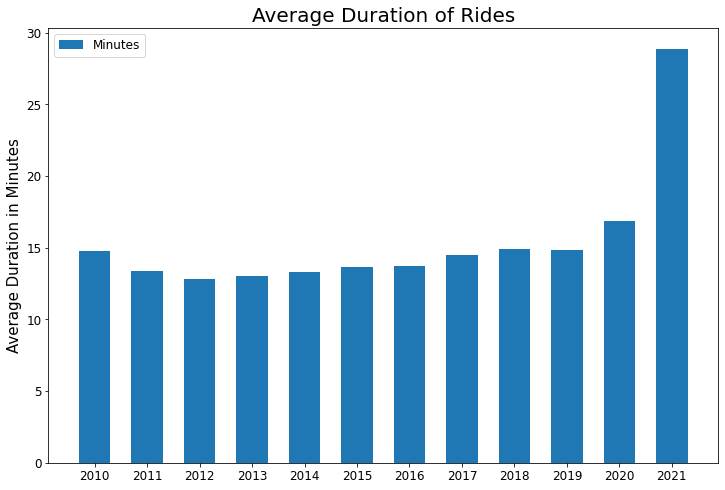

In [44]:
xtick_labels = ecobici_duration_groupby.index.tolist()

xtick_count = [x for x in range(1, len(xtick_labels)+1)]   # the x locations for the groups

width = 0.6       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12,8))

p1 = ax.bar(xtick_count, duration, width, label='Minutes')

ax.set_xticks(xtick_count)
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Average Duration in Minutes')
ax.set_title('Average Duration of Rides')
ax.legend()

# ax.bar_label(p1, label_type='center')
# ax.bar_label(p2, label_type='center')
# ax.bar_label(p2)
    
plt.show()



In [49]:
ecobici_gender_ride_length_groupby = ecobici_rides_df_test.groupby([ecobici_rides_df_test.Usage_Timestamp.dt.year, 
                                                        "Genero_Usuario"]).agg({"Duration(Min)": "mean"}).unstack()

ecobici_gender_ride_length_groupby

Duration(Min)           
Genero_Usuario              F          M
Usage_Timestamp                         
2010                16.331900  14.221233
2011                13.687336  13.233000
2012                13.536881  12.525235
2013                13.537046  12.828048
2014                13.789550  13.094612
2015                14.053353  13.501872
2016                14.284651  13.563391
2017                14.963557  14.332618
2018                15.346926  14.772957
2019                15.164952  14.742035
2020                17.416430  16.649518
2021                29.773214  28.475799

In [50]:
ecobici_gender_ride_length_groupby.columns = list(map(' '.join, ecobici_gender_ride_length_groupby.columns.values))

ecobici_gender_ride_length_groupby = ecobici_gender_ride_length_groupby.rename(columns={'Duration(Min) F': 'Ave Duration F',
                                                       'Duration(Min) M': 'Ave Duration M'},
                                                       index={'Usage_Timestamp': 'Year'})

ecobici_gender_ride_length_groupby.head()

,Ave Duration F,Ave Duration M
Usage_Timestamp,,
2010,16.331900,14.221233
2011,13.687336,13.233000
2012,13.536881,12.525235
2013,13.537046,12.828048
2014,13.789550,13.094612


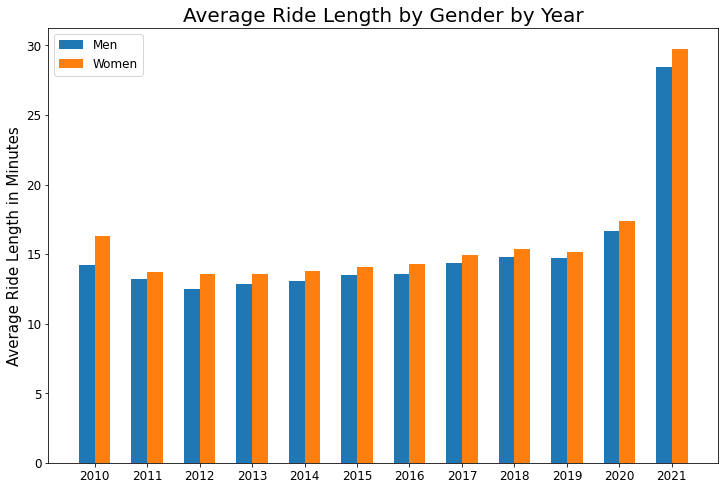

In [62]:
xtick_labels = ecobici_gender_ride_length_groupby.index.tolist()
xtick_count = np.arange(len(xtick_labels))   # the x locations for the groups

m_rides = ecobici_gender_ride_length_groupby['Ave Duration M']
f_rides = ecobici_gender_ride_length_groupby['Ave Duration F']

width = .3       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12,8))

rects1 = ax.bar(xtick_count - width/2, m_rides, width, 
                label='Men')
rects2 = ax.bar(xtick_count + width/2, f_rides, width,
                label='Women')

ax.set_xticks(xtick_count)
ax.set_xticklabels(xtick_labels)
    
ax.set_ylabel('Average Ride Length in Minutes')
ax.set_title('Average Ride Length by Gender by Year')
ax.legend()

    
plt.show()



In [65]:
ecobici_rides_df_test

,Genero_Usuario,Edad_Usuario,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Usage_Timestamp,Duration(Min)
0,M,28,85,85,2010-02-16 12:45:37.427,3.1
1,M,35,78,63,2010-02-19 13:52:30.700,12.1
2,M,34,85,23,2010-02-21 14:30:46.390,26.8
3,M,46,20,17,2010-02-22 16:17:10.470,6.4
4,F,28,74,46,2010-02-23 18:51:57.057,14.9
...,...,...,...,...,...,...
707034,M,27,316,54,2021-12-05 09:29:40.000,13.3
707035,M,49,158,83,2021-12-05 09:24:30.000,10.8
707036,M,33,417,313,2021-12-05 08:55:46.000,12.1
707037,F,23,467,260,2021-12-05 08:54:12.000,33.7


## Routes

In [74]:
routes = {}

for index, row in ecobici_rides_df_test.iterrows():
    start_station = 
    end_station = 
    route = (row['Ciclo_Estacion_Retiro'], row['Ciclo_Estacion_Arribo'])
    if route not in routes: 
        routes[route] = 1
    else:
        routes[route] +=1
    if index%100000 ==0:
        print(f'We\'re up to {index}!')

routes

We're up to 0!
We're up to 100000!
We're up to 200000!
We're up to 300000!
We're up to 400000!
We're up to 500000!
We're up to 600000!
We're up to 700000!


{(85, 85): 173,
 (78, 63): 43,
 (85, 23): 32,
 (20, 17): 162,
 (74, 46): 52,
 (85, 16): 37,
 (85, 25): 32,
 (85, 34): 49,
 (27, 35): 61,
 (23, 27): 328,
 (4, 4): 99,
 (15, 20): 90,
 (19, 13): 71,
 (27, 55): 60,
 (76, 44): 8,
 (6, 2): 26,
 (34, 25): 103,
 (79, 33): 17,
 (50, 54): 15,
 (75, 77): 49,
 (24, 56): 48,
 (52, 66): 8,
 (72, 36): 106,
 (85, 22): 12,
 (13, 63): 12,
 (49, 56): 30,
 (27, 4): 100,
 (80, 80): 87,
 (52, 74): 4,
 (27, 3): 27,
 (72, 83): 93,
 (39, 71): 6,
 (1, 12): 93,
 (75, 78): 16,
 (51, 27): 38,
 (70, 70): 281,
 (59, 37): 45,
 (73, 21): 8,
 (84, 36): 32,
 (7, 56): 20,
 (7, 1): 110,
 (53, 66): 95,
 (63, 21): 23,
 (79, 13): 10,
 (15, 30): 50,
 (71, 84): 171,
 (17, 12): 44,
 (83, 46): 14,
 (83, 66): 102,
 (69, 76): 34,
 (17, 34): 87,
 (14, 1): 55,
 (46, 85): 15,
 (11, 15): 56,
 (19, 31): 23,
 (14, 20): 40,
 (82, 72): 3,
 (85, 42): 13,
 (3, 56): 8,
 (81, 77): 8,
 (10, 16): 117,
 (9, 48): 8,
 (31, 9): 35,
 (61, 1): 15,
 (22, 20): 41,
 (36, 44): 33,
 (59, 26): 7,
 (2, 15):

In [76]:
most_popular_routes = dict(sorted(routes.items(), key=lambda item: item[1], reverse=True))
most_popular_routes

{(18, 1): 477,
 (211, 217): 434,
 (1, 18): 427,
 (174, 183): 342,
 (41, 3): 335,
 (23, 27): 328,
 (183, 174): 318,
 (61, 61): 309,
 (217, 211): 305,
 (34, 1): 298,
 (36, 53): 292,
 (1, 35): 291,
 (21, 27): 290,
 (70, 70): 281,
 (27, 43): 281,
 (27, 29): 278,
 (35, 1): 274,
 (27, 1): 268,
 (41, 19): 265,
 (1, 27): 259,
 (85, 174): 257,
 (53, 36): 250,
 (27, 27): 250,
 (208, 206): 248,
 (165, 163): 242,
 (24, 27): 238,
 (206, 208): 234,
 (208, 242): 231,
 (151, 158): 228,
 (84, 71): 225,
 (84, 63): 224,
 (270, 266): 224,
 (27, 41): 221,
 (174, 85): 218,
 (208, 197): 217,
 (84, 61): 215,
 (25, 27): 214,
 (41, 10): 214,
 (77, 68): 213,
 (32, 4): 213,
 (1, 1): 212,
 (15, 27): 211,
 (27, 15): 210,
 (135, 136): 208,
 (64, 45): 207,
 (84, 64): 205,
 (73, 77): 205,
 (1, 86): 205,
 (28, 27): 204,
 (84, 59): 204,
 (41, 20): 201,
 (41, 18): 199,
 (197, 208): 198,
 (256, 183): 197,
 (84, 74): 195,
 (158, 141): 194,
 (77, 73): 191,
 (77, 66): 191,
 (57, 36): 190,
 (7, 7): 188,
 (22, 27): 187,
 (174,